<a href="https://colab.research.google.com/github/Gail529/chess_ML/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Required Libraries

In [1]:
!pip install category_encoders

     |████████████████████████████████| 81kB 3.5MB/s 


In [49]:
%matplotlib inline
import warnings
import category_encoders as ce
from category_encoders.hashing import HashingEncoder
from category_encoders.binary import BinaryEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import VotingClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report 

In [15]:
data=pd.read_csv('/content/games.csv')


In [62]:
print(data.shape)
data.head()


(20058, 28)


,rated,turns,victory_status,increment_code_0,increment_code_1,increment_code_2,increment_code_3,increment_code_4,increment_code_5,increment_code_6,increment_code_7,increment_code_8,increment_code_9,white_rating,black_rating,opening_eco_0,opening_eco_1,opening_eco_2,opening_eco_3,opening_eco_4,opening_eco_5,opening_eco_6,opening_eco_7,opening_eco_8,opening_eco_9,opening_ply,rating_diff,winner
0,0,-1.413952,0,0,0,0,0,0,0,0,0,0,1,-0.331788,-1.366985,0,0,0,0,0,0,0,0,0,1,0.065432,1.209491,2
1,1,-1.324585,1,0,0,0,0,0,0,0,0,1,0,-0.942955,-1.126459,0,0,0,0,0,0,0,0,1,0,-0.292083,0.213629,0
2,1,0.015907,1,0,0,0,0,0,0,0,0,1,0,-0.345522,-0.305234,0,0,0,0,0,0,0,0,1,1,-0.649599,-0.047383,2
3,1,0.015907,1,0,0,0,0,0,0,0,0,1,1,-0.541233,-0.463294,0,0,0,0,0,0,0,1,0,0,-0.649599,-0.091555,2
4,1,1.028724,1,0,0,0,0,0,0,0,1,0,0,-0.252817,-0.411753,0,0,0,0,0,0,0,1,0,1,0.065432,0.185520,2


In [17]:
data.columns
del data['id']
del data['created_at']
del data['last_move_at']
del data['white_id']
del data['black_id']
del data['opening_name']
del data['moves']


In [18]:
data['rating_diff'] = data['white_rating']-data['black_rating']
data.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'increment_code',
       'white_rating', 'black_rating', 'opening_eco', 'opening_ply',
       'rating_diff'],
      dtype='object')

In [8]:
data.dtypes

rated               bool
turns              int64
victory_status    object
winner            object
increment_code    object
white_rating       int64
black_rating       int64
opening_eco       object
opening_ply        int64
rating_diff        int64
dtype: object

In [9]:
data.describe()

,turns,white_rating,black_rating,opening_ply,rating_diff
count,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,60.465999,1596.631868,1588.831987,4.816981,7.799880
std,33.570585,291.253376,291.036126,2.797152,249.036667
min,1.000000,784.000000,789.000000,1.000000,-1605.000000
25%,37.000000,1398.000000,1391.000000,3.000000,-108.000000
50%,55.000000,1567.000000,1562.000000,4.000000,3.000000
75%,79.000000,1793.000000,1784.000000,6.000000,122.000000
max,349.000000,2700.000000,2723.000000,28.000000,1499.000000


# Scaling and Encoding categorical variables

In [19]:
#Scaling continous variables 
#standardisation
from sklearn import preprocessing 
cols=['turns','white_rating', 'black_rating', 'opening_ply','rating_diff']
cols_to_scale=data[cols]
Standardisation = preprocessing.StandardScaler()  
scaled_cols= Standardisation.fit_transform(cols_to_scale) 
print ("\nStandardised columns : \n", scaled_cols) 


Standardised columns : 
 [[-1.4139516  -0.33178766 -1.36698461  0.0654322   1.20949108]
 [-1.32458542 -0.94295461 -1.12645864 -0.29208323  0.21362897]
 [ 0.01590722 -0.34552175 -0.30523428 -0.64959865 -0.04738328]
 ...
 [-0.75859964 -1.2966074  -1.04055651 -0.64959865 -0.30036438]
 [ 1.44576604 -0.81248077 -1.24328554 -0.29208323  0.50275023]
 [ 0.52231555 -1.24167104 -0.858444   -0.64959865 -0.44894059]]


In [20]:
data[cols]=scaled_cols

In [11]:
#Scaling continous variables 
#min max scaling
cols=['turns','white_rating', 'black_rating', 'opening_ply']
cols_to_scale=data[cols]
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
scaled_cols = min_max_scaler.fit_transform(cols_to_scale) 
  
print ("\nAfter min max Scaling : \n", scaled_cols) 



After min max Scaling : 
 [[0.03448276 0.3736952  0.20785936 0.14814815]
 [0.04310345 0.28079332 0.24405377 0.11111111]
 [0.17241379 0.37160752 0.36763185 0.07407407]
 ...
 [0.09770115 0.22703549 0.25698035 0.07407407]
 [0.31034483 0.3006263  0.22647363 0.11111111]
 [0.22126437 0.23538622 0.28438469 0.07407407]]


In [21]:
# label encoding the data 
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
print(categorical_cols)
le = LabelEncoder() 
data['winner']= le.fit_transform(data['winner'])
data['rated']= le.fit_transform(data['rated'])
data['victory_status']= le.fit_transform(data['rated'])

#for categorical_cols with high cardinality
encoder= ce.BinaryEncoder(cols=['increment_code','opening_eco'])
data_encoded=encoder.fit_transform(data) 
data_encoded



['victory_status', 'winner', 'increment_code', 'opening_eco']


/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,rated,turns,victory_status,winner,increment_code_0,increment_code_1,increment_code_2,increment_code_3,increment_code_4,increment_code_5,increment_code_6,increment_code_7,increment_code_8,increment_code_9,white_rating,black_rating,opening_eco_0,opening_eco_1,opening_eco_2,opening_eco_3,opening_eco_4,opening_eco_5,opening_eco_6,opening_eco_7,opening_eco_8,opening_eco_9,opening_ply,rating_diff
0,0,-1.413952,0,2,0,0,0,0,0,0,0,0,0,1,-0.331788,-1.366985,0,0,0,0,0,0,0,0,0,1,0.065432,1.209491
1,1,-1.324585,1,0,0,0,0,0,0,0,0,0,1,0,-0.942955,-1.126459,0,0,0,0,0,0,0,0,1,0,-0.292083,0.213629
2,1,0.015907,1,2,0,0,0,0,0,0,0,0,1,0,-0.345522,-0.305234,0,0,0,0,0,0,0,0,1,1,-0.649599,-0.047383
3,1,0.015907,1,2,0,0,0,0,0,0,0,0,1,1,-0.541233,-0.463294,0,0,0,0,0,0,0,1,0,0,-0.649599,-0.091555
4,1,1.028724,1,2,0,0,0,0,0,0,0,1,0,0,-0.252817,-0.411753,0,0,0,0,0,0,0,1,0,1,0.065432,0.185520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,1,-1.086276,1,2,0,0,0,0,0,1,0,0,0,0,0.324015,-1.267338,0,0,0,0,1,0,0,0,0,0,-1.007114,1.860014
20054,1,0.641470,1,0,0,0,0,0,0,0,0,1,0,1,-1.248538,-1.349804,0,0,0,0,1,0,0,1,1,0,-1.007114,0.117255
20055,1,-0.758600,1,2,0,0,0,0,0,0,0,1,0,1,-1.296607,-1.040557,0,0,0,0,0,0,0,1,1,1,-0.649599,-0.300364
20056,1,1.445766,1,2,0,0,0,0,0,0,0,1,0,1,-0.812481,-1.243286,0,0,0,1,0,1,1,0,1,0,-0.292083,0.502750


In [29]:
col_list=['rated', 'turns', 'victory_status','increment_code_0','increment_code_1', 'increment_code_2', 'increment_code_3','increment_code_4', 'increment_code_5', 'increment_code_6','increment_code_7', 'increment_code_8', 'increment_code_9',
'white_rating', 'black_rating', 'opening_eco_0', 'opening_eco_1','opening_eco_2', 'opening_eco_3', 'opening_eco_4', 'opening_eco_5','opening_eco_6', 'opening_eco_7', 'opening_eco_8', 'opening_eco_9','opening_ply', 'rating_diff', 'winner']
data=data_encoded.reindex(columns=col_list)
cols=data.columns
cols[27]

'winner'

In [32]:

x=data.iloc[:,0:27]
y=data['winner']
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)


In [33]:
x

,rated,turns,victory_status,increment_code_0,increment_code_1,increment_code_2,increment_code_3,increment_code_4,increment_code_5,increment_code_6,increment_code_7,increment_code_8,increment_code_9,white_rating,black_rating,opening_eco_0,opening_eco_1,opening_eco_2,opening_eco_3,opening_eco_4,opening_eco_5,opening_eco_6,opening_eco_7,opening_eco_8,opening_eco_9,opening_ply,rating_diff
0,0,-1.413952,0,0,0,0,0,0,0,0,0,0,1,-0.331788,-1.366985,0,0,0,0,0,0,0,0,0,1,0.065432,1.209491
1,1,-1.324585,1,0,0,0,0,0,0,0,0,1,0,-0.942955,-1.126459,0,0,0,0,0,0,0,0,1,0,-0.292083,0.213629
2,1,0.015907,1,0,0,0,0,0,0,0,0,1,0,-0.345522,-0.305234,0,0,0,0,0,0,0,0,1,1,-0.649599,-0.047383
3,1,0.015907,1,0,0,0,0,0,0,0,0,1,1,-0.541233,-0.463294,0,0,0,0,0,0,0,1,0,0,-0.649599,-0.091555
4,1,1.028724,1,0,0,0,0,0,0,0,1,0,0,-0.252817,-0.411753,0,0,0,0,0,0,0,1,0,1,0.065432,0.185520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,1,-1.086276,1,0,0,0,0,0,1,0,0,0,0,0.324015,-1.267338,0,0,0,0,1,0,0,0,0,0,-1.007114,1.860014
20054,1,0.641470,1,0,0,0,0,0,0,0,1,0,1,-1.248538,-1.349804,0,0,0,0,1,0,0,1,1,0,-1.007114,0.117255
20055,1,-0.758600,1,0,0,0,0,0,0,0,1,0,1,-1.296607,-1.040557,0,0,0,0,0,0,0,1,1,1,-0.649599,-0.300364
20056,1,1.445766,1,0,0,0,0,0,0,0,1,0,1,-0.812481,-1.243286,0,0,0,1,0,1,1,0,1,0,-0.292083,0.502750


Logistic regression


In [41]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model with data
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


[[1067    0  749]
 [  96    1   95]
 [ 560    0 1444]]


Text(0.5, 257.44, 'Predicted label')

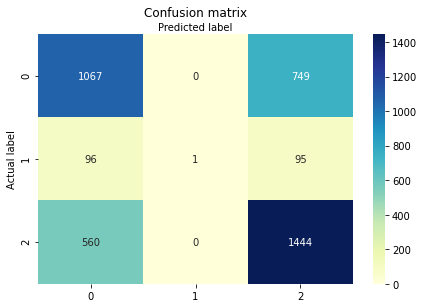

In [48]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.6261216350947159
              precision    recall  f1-score   support

           0       0.62      0.59      0.60      1816
           1       1.00      0.01      0.01       192
           2       0.63      0.72      0.67      2004

    accuracy                           0.63      4012
   macro avg       0.75      0.44      0.43      4012
weighted avg       0.64      0.63      0.61      4012



SVM

In [56]:
from sklearn import model_selection,svm
SVM=svm.SVC(C=0.1,kernel='linear')
SVM.fit(X_train,y_train)


SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
y_pred=SVM.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      1816
           1       0.00      0.00      0.00       192
           2       0.62      0.74      0.68      2004

    accuracy                           0.63      4012
   macro avg       0.42      0.44      0.42      4012
weighted avg       0.60      0.63      0.61      4012



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN

In [61]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.68      0.61      1816
           1       0.39      0.05      0.08       192
           2       0.63      0.55      0.59      2004

    accuracy                           0.58      4012
   macro avg       0.52      0.42      0.43      4012
weighted avg       0.58      0.58      0.57      4012



checking for constant features


In [ ]:
# import and create the VarianceThreshold object.
from sklearn.feature_selection import VarianceThreshold
vs_constant = VarianceThreshold(threshold=0)

# select the numerical columns only.
numerical_x_train = x_train[x_train.select_dtypes([np.number]).columns]

# fit the object to our data.
vs_constant.fit(numerical_x_train)

# get the constant colum names.
constant_columns = [column for column in numerical_x_train.columns
                    if column not in numerical_x_train.columns[vs_constant.get_support()]]

# detect constant categorical variables.
constant_cat_columns = [column for column in x_train.columns 
                        if (x_train[column].dtype == "O" and len(x_train[column].unique())  == 1 )]

# conctenating the two lists.
all_constant_columns = constant_cat_columns + constant_columns

# drop the constant columns
x_train.drop(labels=all_constant_columns, axis=1, inplace=True)
x_test.drop(labels=all_constant_columns, axis=1, inplace=True)


checking for quasi constant features

In [ ]:
threshold = 0.98

# create empty list
quasi_constant_feature = []

# loop over all the columns
for feature in x_train.columns:

    # calculate the ratio.
    predominant = (x_train[feature].value_counts() / np.float(len(x_train))).sort_values(ascending=False).values[0]
    
    # append the column name if it is bigger than the threshold
    if predominant >= threshold:
        quasi_constant_feature.append(feature)   
        
print(quasi_constant_feature)

# drop the quasi constant columns
x_train.drop(labels=quasi_constant_feature, axis=1, inplace=True)
x_test.drop(labels=quasi_constant_feature, axis=1, inplace=True)


# Correlation filter methods

In [ ]:
# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = x_train.corr()

# optional: display a heatmap of the correlation matrix
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
x_train.drop(labels=corr_features, axis=1, inplace=True)
x_test.drop(labels=corr_features, axis=1, inplace=True)
